## K-Means Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans  

### Assignment 1 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

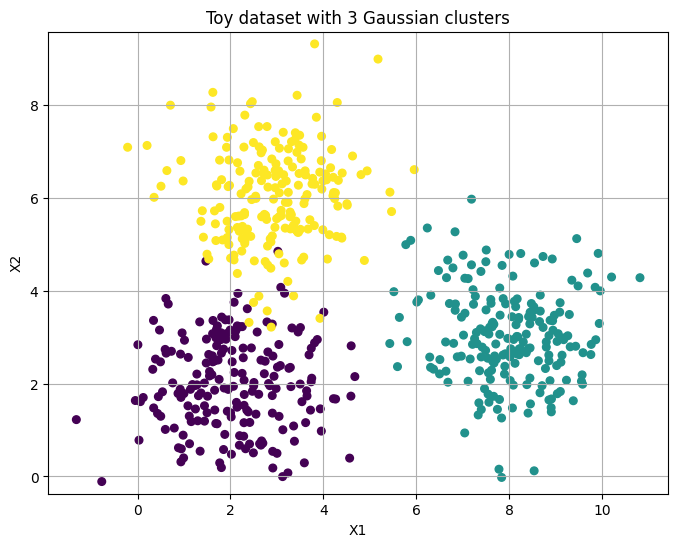

In [2]:
# Số điểm cho mỗi cụm
n_points = 200

# Ma trận hiệp phương sai (covariance)
Sigma = np.array([[1, 0], [0, 1]])  # Identity matrixy

# Các trung tâm của phân phối Gaussian
mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

# Sinh dữ liệu từ 3 phân phối Gaussian
data1 = np.random.multivariate_normal(mean1, Sigma, n_points)
data2 = np.random.multivariate_normal(mean2, Sigma, n_points)
data3 = np.random.multivariate_normal(mean3, Sigma, n_points)

# Ghép tất cả dữ liệu lại với nhau
X = np.vstack([data1, data2, data3])

# Gán nhãn cho từng cụm (có thể dùng cho ML hoặc vẽ biểu đồ)
y = np.array([0]*n_points + [1]*n_points + [2]*n_points)

# Vẽ dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Toy dataset with 3 Gaussian clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis ('equal')
plt.grid(True)
plt.show()


In [3]:
class KMeans_ ():
    def __init__ (self, n_clusters=3, max_iter=100, tol=1e-4, random_state=0):
        ''''''
        self.n_clusters = n_clusters
        self.max_iter_ = max_iter
        self.tol = tol                      # Sai số cho phép để dừng
        self.random_state = random_state
        self.cluster_centers_ = None
        self.inertia_ = None                # Tổng sai số
        self.labels_ = None                 # Nhãn
        self.n_iter_ = 0                    # Số vòng lặp thực tế
        
    def fit (self, X: np.ndarray) -> np.ndarray:
        ''''''
        np.random.seed (self.random_state)
        random_idx = np.random.permutation (X.shape [0]) [:self.n_clusters]
        self.cluster_centers_ = X[random_idx]
        
        for i in range (self.max_iter_):
            distances = self._compute_distances_ (X)
            labels = np.argmin (distances, axis=1)
            
            # Update centroids
            new_centroids = []
            for j in range (self.n_clusters):
                cluster_points = X[labels == j]
                # Tính trung bình tất cả các điểm thuộc về điểm đó
                if (len (cluster_points) > 0):
                    centroid = cluster_points.mean (axis=0)
                else:
                    centroid = self.cluster_centers_[j]
                
                new_centroids.append (centroid)
            new_centroids = np.array (new_centroids)
            shift = np.sum ((new_centroids - self.cluster_centers_) ** 2)
            if shift <= self.tol:
                break
            self.cluster_centers_ = new_centroids
            self.n_iter_ += 1
            
        self.labels_ = labels
        self.inertia_ = np.sum ((X - self.cluster_centers_[labels]) ** 2)
        
    def predict (self, X: np.ndarray):
        distances = self._compute_distances_ (X)
        return np.argmin (distances, axis=1)
    
    def _compute_distances_ (self, X: np.ndarray) -> np.ndarray:
        return np.linalg.norm (X[:, np.newaxis] - self.cluster_centers_, axis=2)

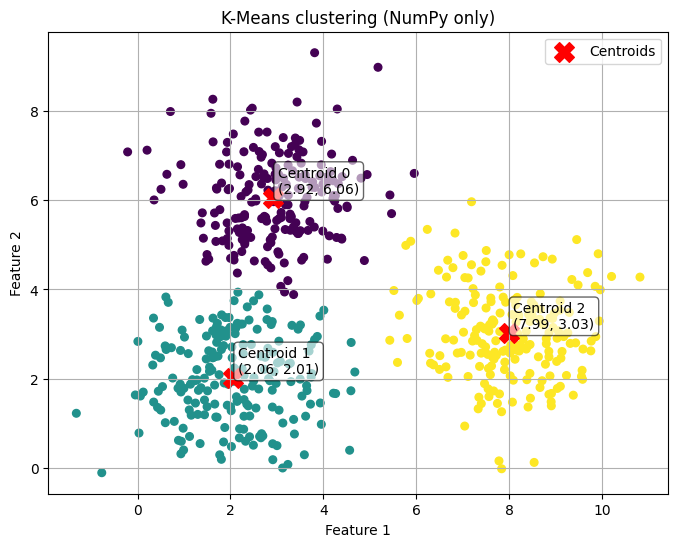

In [4]:
# Run KMeans
kmeans = KMeans_(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add coordinate annotations for centroids
for i, (x, z) in enumerate(kmeans.cluster_centers_):
    plt.text(x + 0.1, z + 0.1, f'Centroid {i}\n({x:.2f}, {z:.2f})', 
             fontsize=10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.6))

plt.title("K-Means clustering (NumPy only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
kmeans.n_iter_

3

In [8]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))
print("Normalized Mutual Info:", normalized_mutual_info_score(y, kmeans.labels_))
print("Homogeneity:", homogeneity_score(y, kmeans.labels_))
print("Completeness:", completeness_score(y, kmeans.labels_))
print("V-Measure:", v_measure_score(y, kmeans.labels_))


Adjusted Rand Index: 0.9510875068183525
Normalized Mutual Info: 0.9293548728064406
Homogeneity: 0.9293407736504377
Completeness: 0.9293689723902505
V-Measure: 0.9293548728064407


In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# Giả sử bạn có X và y (labels gốc)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Dự đoán nhãn (chọn cluster có xác suất cao nhất)
y_pred_em = gmm.predict(X)

# Đánh giá bằng ARI
from sklearn.metrics import adjusted_rand_score
print("ARI:", adjusted_rand_score(y, y_pred_em))


ARI: 0.9463353450452432


### Assignment 2 (2 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

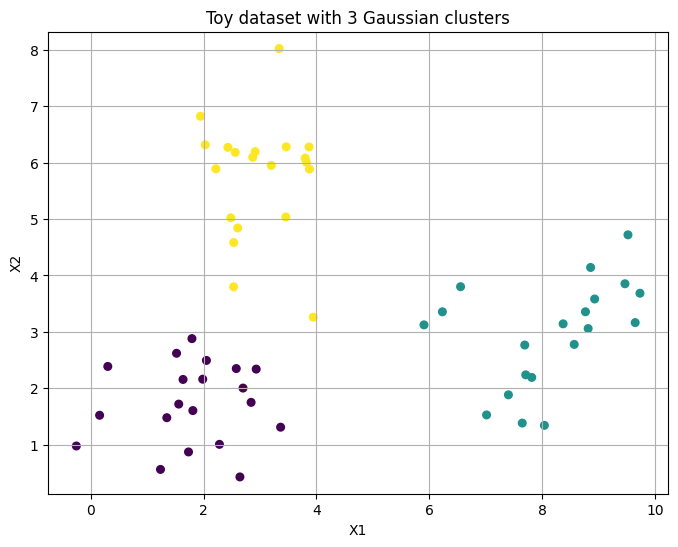

In [10]:
# Số điểm cho mỗi cụm
n_points = 20

# Ma trận hiệp phương sai (covariance)
Sigma = np.array([[1, 0], [0, 1]])  # Identity matrixy

# Các trung tâm của phân phối Gaussian
mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

# Sinh dữ liệu từ 3 phân phối Gaussian
data1 = np.random.multivariate_normal(mean1, Sigma, n_points)
data2 = np.random.multivariate_normal(mean2, Sigma, n_points)
data3 = np.random.multivariate_normal(mean3, Sigma, n_points)

# Ghép tất cả dữ liệu lại với nhau
X = np.vstack([data1, data2, data3])

# Gán nhãn cho từng cụm (có thể dùng cho ML hoặc vẽ biểu đồ)
y = np.array([0]*n_points + [1]*n_points + [2]*n_points)

# Vẽ dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Toy dataset with 3 Gaussian clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis ('equal')
plt.grid(True)
plt.show()


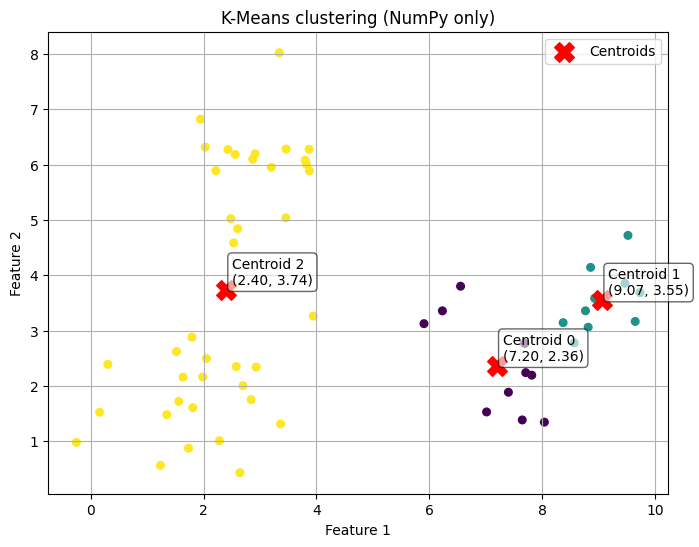

In [11]:
# Run KMeans
kmeans = KMeans_(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add coordinate annotations for centroids
for i, (x, z) in enumerate(kmeans.cluster_centers_):
    plt.text(x + 0.1, z + 0.1, f'Centroid {i}\n({x:.2f}, {z:.2f})', 
             fontsize=10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.6))

plt.title("K-Means clustering (NumPy only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))
print("Normalized Mutual Info:", normalized_mutual_info_score(y, kmeans.labels_))
print("Homogeneity:", homogeneity_score(y, kmeans.labels_))
print("Completeness:", completeness_score(y, kmeans.labels_))
print("V-Measure:", v_measure_score(y, kmeans.labels_))


Adjusted Rand Index: 0.43159922928709055
Normalized Mutual Info: 0.6474642398330627
Homogeneity: 0.579380164285695
Completeness: 0.7336804366512112
V-Measure: 0.6474642398330627


### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

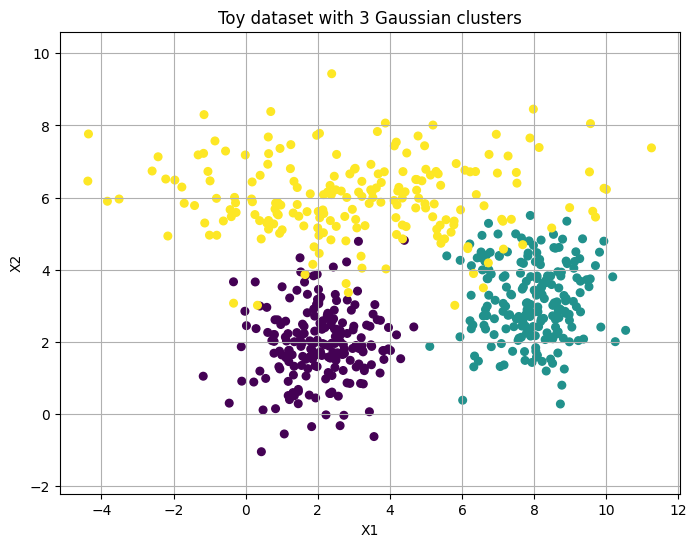

In [13]:
# Số điểm cho mỗi cụm
n_points = 200

# Ma trận hiệp phương sai (covariance)
Sigma1 = np.array([[1, 0], [0, 1]])  # Identity matrixy
Sigma2 = np.array([[10, 0], [0, 1]])

# Các trung tâm của phân phối Gaussian
mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

# Sinh dữ liệu từ 3 phân phối Gaussian
data1 = np.random.multivariate_normal(mean1, Sigma1, n_points)
data2 = np.random.multivariate_normal(mean2, Sigma1, n_points)
data3 = np.random.multivariate_normal(mean3, Sigma2, n_points)

# Ghép tất cả dữ liệu lại với nhau
X = np.vstack([data1, data2, data3])

# Gán nhãn cho từng cụm (có thể dùng cho ML hoặc vẽ biểu đồ)
y = np.array([0]*n_points + [1]*n_points + [2]*n_points)

# Vẽ dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Toy dataset with 3 Gaussian clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis ('equal')
plt.grid(True)
plt.show()


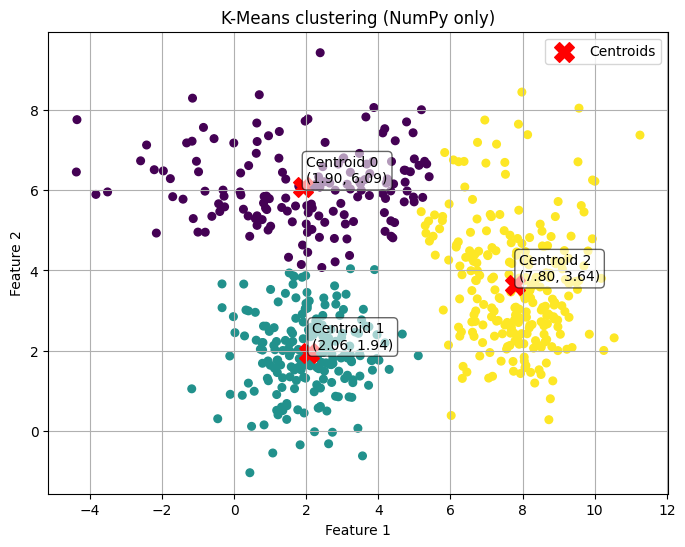

In [14]:
# Run KMeans
kmeans = KMeans_(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add coordinate annotations for centroids
for i, (x, z) in enumerate(kmeans.cluster_centers_):
    plt.text(x + 0.1, z + 0.1, f'Centroid {i}\n({x:.2f}, {z:.2f})', 
             fontsize=10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.6))

plt.title("K-Means clustering (NumPy only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))
print("Normalized Mutual Info:", normalized_mutual_info_score(y, kmeans.labels_))
print("Homogeneity:", homogeneity_score(y, kmeans.labels_))
print("Completeness:", completeness_score(y, kmeans.labels_))
print("V-Measure:", v_measure_score(y, kmeans.labels_))


Adjusted Rand Index: 0.7421971742076604
Normalized Mutual Info: 0.7375940980438647
Homogeneity: 0.7314237740601999
Completeness: 0.7438694140080828
V-Measure: 0.7375940980438647


## Gaussian Mixture Model

# 📊 Gaussian Mixture Model (GMM) – Tóm tắt chi tiết

## 🔹 GMM là gì?
GMM là một mô hình phân cụm xác suất, giả định rằng dữ liệu được tạo ra từ nhiều **phân phối Gaussian (chuẩn)** trộn lại với nhau (mixture of Gaussians).

---

## 🔹 Thành phần chính
1. **Số cụm (K)**: Bạn cần chọn trước số cụm.
2. Mỗi cụm có 3 tham số:
   - `μₖ` (mean): trung tâm của cụm k.
   - `Σₖ` (covariance): ma trận hiệp phương sai – thể hiện hình dạng cụm.
   - `πₖ` (mixing coefficient): xác suất để một điểm thuộc cụm k.

---

## 🔹 EM Algorithm (Expectation-Maximization)

### 🔸 E-step (Expectation)
Tính **xác suất (responsibility)** mà mỗi điểm dữ liệu thuộc về mỗi cụm.  
→ Ví dụ: điểm A có 70% thuộc cụm 1, 25% cụm 2, 5% cụm 3.

### 🔸 M-step (Maximization)
Cập nhật lại `μₖ`, `Σₖ`, `πₖ` dựa trên các xác suất từ bước E.  
→ Lặp lại E và M cho đến khi hội tụ.

---

## 🔹 So sánh GMM với KMeans

| Yếu tố               | KMeans                         | GMM                                      |
|----------------------|-------------------------------|------------------------------------------|
| Phân cụm             | Cứng (hard assignment)        | Mềm (soft assignment – xác suất)         |
| Hình dạng cụm        | Hình cầu                      | Elip, đa dạng                            |
| Khoảng cách          | Euclidean                     | Phân phối xác suất Gaussian              |
| Tính linh hoạt       | Thấp                          | Cao                                      |

---

## 🔹 Ứng dụng GMM
- Phân cụm dữ liệu có hình dạng phức tạp
- Nén ảnh
- Nhận diện tiếng nói
- Phát hiện bất thường (anomaly detection)

---



### Assignment 1 (2 scores):
- Use Numpy only to implement the Guassian Mixture Model.
- Train Gaussian Mixture Model with EM method.

In [ ]:
class GMM:
    def __init__(self, n_components=3, max_iter=100, tol=1e-4, random_state=None):
        self.n_components = n_components    # số cụm
        self.max_iter = max_iter            # số vòng lặp tối đa
        self.tol = tol                      # ngưỡng dừng (thay đổi likelihood nhỏ)
        self.random_state = random_state
        self.means_ = None                  # vector trung bình mỗi cụm
        self.covariances_ = None            # ma trận hiệp phương sai mỗi cụm
        self.weights_ = None                # trọng số của mỗi cụm
        self.resp_ = None                  # ma trận trách nhiệm (responsibilities)
        self.log_likelihood_ = []           # lưu log-likelihood qua các vòng
    
    def _initialize_parameters(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        # Khởi tạo means bằng cách chọn ngẫu nhiên các điểm
        random_idx = np.random.choice(n_samples, self.n_components, replace=False)
        self.means_ = X[random_idx]
        
        # Khởi tạo ma trận hiệp phương sai là ma trận đơn vị
        self.covariances_ = np.array([np.eye(n_features)] * self.n_components)
        
        # Khởi tạo trọng số đều nhau
        self.weights_ = np.ones(self.n_components) / self.n_components
    
    def _gaussian_pdf(self, X, mean, cov):
        """Tính xác suất mật độ Gaussian đa biến"""
        n_features = X.shape[1]
        diff = X - mean
        cov_inv = np.linalg.inv(cov)
        exponent = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
        denom = np.sqrt((2 * np.pi) ** n_features * np.linalg.det(cov))
        return np.exp(-0.5 * exponent) / denom
    
    def fit(self, X):
        n_samples, n_features = X.shape
        self._initialize_parameters(X)
        
        for iteration in range(self.max_iter):
            # E-step: Tính responsibility
            resp = np.zeros((n_samples, self.n_components))
            for k in range(self.n_components):
                resp[:, k] = self.weights_[k] * self._gaussian_pdf(X, self.means_[k], self.covariances_[k])
            
            # Chuẩn hóa để tổng xác suất mỗi điểm = 1
            resp_sum = resp.sum(axis=1)[:, np.newaxis]
            resp = resp / resp_sum
            
            # M-step: Cập nhật parameters dựa trên resp
            Nk = resp.sum(axis=0)  # tổng responsibility từng cụm
            
            self.means_ = (resp.T @ X) / Nk[:, np.newaxis]
            
            for k in range(self.n_components):
                diff = X - self.means_[k]
                weighted_cov = (resp[:, k][:, np.newaxis] * diff).T @ diff
                self.covariances_[k] = weighted_cov / Nk[k]
                # Để tránh ma trận hiệp phương sai bị suy biến, thêm epsilon nhỏ vào đường chéo
                self.covariances_[k] += 1e-6 * np.eye(n_features)
            
            self.weights_ = Nk / n_samples
            
            # Tính log-likelihood để theo dõi hội tụ
            log_likelihood = np.sum(np.log(resp_sum))
            self.log_likelihood_.append(log_likelihood)
            
            if iteration > 0:
                if abs(self.log_likelihood_[-1] - self.log_likelihood_[-2]) < self.tol:
                    break
        
        self.resp_ = resp
        self.labels_ = resp.argmax(axis=1)  # gán nhãn cụm theo responsibility lớn nhất
    
    def predict_proba(self, X):
        """Trả về xác suất thuộc mỗi cụm"""
        n_samples = X.shape[0]
        probs = np.zeros((n_samples, self.n_components))
        for k in range(self.n_components):
            probs[:, k] = self.weights_[k] * self._gaussian_pdf(X, self.means_[k], self.covariances_[k])
        probs /= probs.sum(axis=1)[:, np.newaxis]
        return probs
    
    def predict(self, X):
        """Gán nhãn cụm"""
        probs = self.predict_proba(X)
        return probs.argmax(axis=1)


In [28]:
import numpy as np

class GMM:
    def __init__(self, n_components=3, max_iter=100, tol=1e-4, random_state=None):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        
        self.means_ = None
        self.covariances_ = None
        self.weights_ = None
        self.resp_ = None
        self.log_likelihood_ = []

    def _initialize_parameters(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        random_idx = np.random.choice(n_samples, self.n_components, replace=False)
        self.means_ = X[random_idx]

        self.covariances_ = np.array([np.eye(n_features) for _ in range(self.n_components)])

        self.weights_ = np.ones(self.n_components) / self.n_components

    def _gaussian_pdf(self, X, mean, cov):
        n_features = X.shape[1]
        diff = X - mean
        try:
            cov_inv = np.linalg.inv(cov)
            sign, logdet = np.linalg.slogdet(cov)
            if sign != 1:
                # Ma trận covariance không dương xác định, thêm epsilon
                cov += 1e-6 * np.eye(n_features)
                cov_inv = np.linalg.inv(cov)
                sign, logdet = np.linalg.slogdet(cov)
        except np.linalg.LinAlgError:
            # Ma trận không khả nghịch, thêm epsilon
            cov += 1e-6 * np.eye(n_features)
            cov_inv = np.linalg.inv(cov)
            sign, logdet = np.linalg.slogdet(cov)

        exponent = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
        norm_const = -0.5 * (n_features * np.log(2 * np.pi) + logdet)
        return np.exp(norm_const - 0.5 * exponent)

    def fit(self, X):
        n_samples, n_features = X.shape
        self._initialize_parameters(X)

        for iteration in range(self.max_iter):
            # E-step: Tính responsibilities
            resp = np.zeros((n_samples, self.n_components))
            for k in range(self.n_components):
                resp[:, k] = self.weights_[k] * self._gaussian_pdf(X, self.means_[k], self.covariances_[k])

            resp_sum = resp.sum(axis=1)[:, np.newaxis]
            # Tránh chia cho 0
            resp_sum[resp_sum == 0] = 1e-10
            resp /= resp_sum

            # M-step: cập nhật parameters
            Nk = resp.sum(axis=0)  # tổng responsibilities từng cụm

            self.means_ = (resp.T @ X) / Nk[:, np.newaxis]

            for k in range(self.n_components):
                diff = X - self.means_[k]
                weighted_cov = (resp[:, k][:, np.newaxis] * diff).T @ diff
                self.covariances_[k] = weighted_cov / Nk[k]
                # Thêm epsilon vào đường chéo để tránh ma trận suy biến
                self.covariances_[k] += 1e-6 * np.eye(n_features)

            self.weights_ = Nk / n_samples

            # Tính log-likelihood
            log_likelihood = np.sum(np.log(resp_sum))
            self.log_likelihood_.append(log_likelihood)

            # Kiểm tra hội tụ
            if iteration > 0 and abs(self.log_likelihood_[-1] - self.log_likelihood_[-2]) < self.tol:
                break

        self.resp_ = resp
        self.labels_ = resp.argmax(axis=1)

    def predict_proba(self, X):
        n_samples = X.shape[0]
        probs = np.zeros((n_samples, self.n_components))
        for k in range(self.n_components):
            probs[:, k] = self.weights_[k] * self._gaussian_pdf(X, self.means_[k], self.covariances_[k])
        sum_probs = probs.sum(axis=1)[:, np.newaxis]
        sum_probs[sum_probs == 0] = 1e-10
        probs /= sum_probs
        return probs

    def predict(self, X):
        probs = self.predict_proba(X)
        return probs.argmax(axis=1)


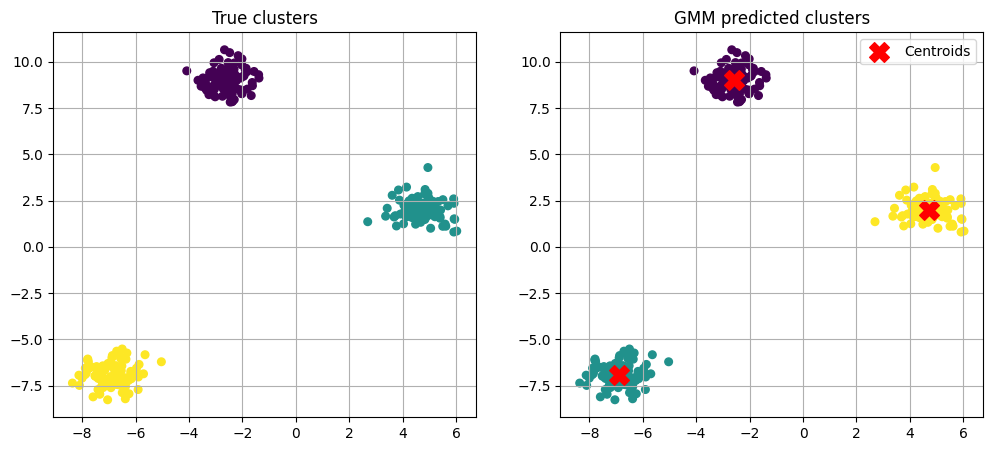

In [29]:
from sklearn.datasets import make_blobs

# --- Dữ liệu tạo 3 cụm ---
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# --- Train GMM trên dữ liệu ---
gmm = GMM(n_components=3, max_iter=100, tol=1e-4, random_state=42)
gmm.fit(X)

# --- Vẽ kết quả ---
plt.figure(figsize=(12,5))

# Dữ liệu thật (color theo label thật)
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y_true, cmap='viridis', s=30)
plt.title("True clusters")
plt.grid(True)

# Kết quả GMM (color theo label dự đoán)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=gmm.labels_, cmap='viridis', s=30)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c='red', marker='X', s=200, label='Centroids')
plt.title("GMM predicted clusters")
plt.legend()
plt.grid(True)

plt.show()

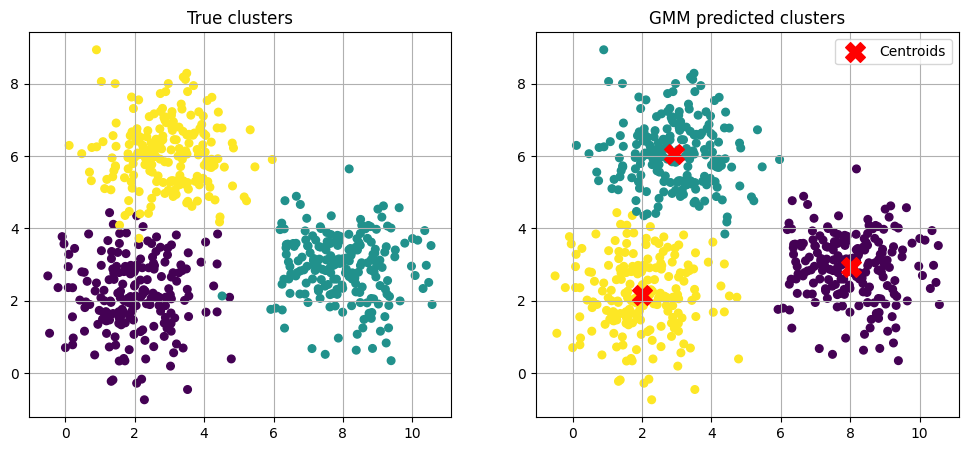

In [30]:
n_points = 200

# Ma trận hiệp phương sai
Sigma = np.array([[1, 0], [0, 1]]) 

mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

data1 = np.random.multivariate_normal(mean1, Sigma, n_points)
data2 = np.random.multivariate_normal(mean2, Sigma, n_points)
data3 = np.random.multivariate_normal(mean3, Sigma, n_points)

# Ghép dữ liệu
X = np.vstack([data1, data2, data3])

# Gán nhãn cho từng cụm
y_true = np.array([0]*n_points + [1]*n_points + [2]*n_points)

# --- Train GMM trên dữ liệu ---
gmm = GMM(n_components=3, max_iter=100, tol=1e-4, random_state=42)
gmm.fit(X)

# --- Vẽ kết quả ---
plt.figure(figsize=(12,5))

# Dữ liệu thật (color theo label thật)
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y_true, cmap='viridis', s=30)
plt.title("True clusters")
plt.grid(True)

# Kết quả GMM (color theo label dự đoán)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=gmm.labels_, cmap='viridis', s=30)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c='red', marker='X', s=200, label='Centroids')
plt.title("GMM predicted clusters")
plt.legend()
plt.grid(True)

plt.show()

### Assignment 2 (2 scores):

Use the Gaussian Mixture Model to filter out background of a given image.

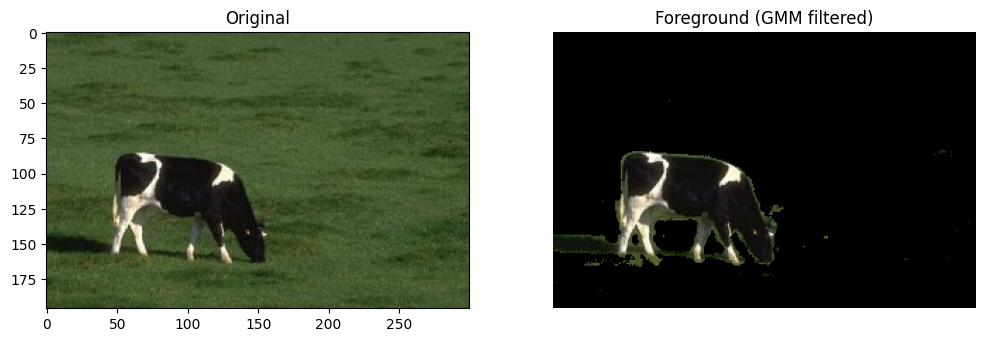

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Đọc ảnh
img = cv2.imread('cow.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB

# Bước 2: Trích xuất đặc trưng từ từng pixel
pixels = img_rgb.reshape(-1, 3)

# Bước 3: Áp dụng Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

    # GMM với 2 cụm (foreground + background)
gmm = GMM(n_components=2, random_state=0)
gmm.fit(pixels)

    # Dự đoán mỗi pixel thuộc cụm nào
labels = gmm.predict(pixels)

# Bước 4: Tạo mask cho foreground
    # Đếm số pixel mỗi cụm
from collections import Counter
counts = Counter(labels)

    # Cụm nhỏ hơn là foreground
fg_label = min(counts, key=counts.get)

    # Tạo mask
mask = (labels == fg_label).astype(np.uint8)
mask = mask.reshape(img.shape[:2])

# Bước 5: Áp dụng mask để lọc nền
    # Áp dụng mask lên ảnh RGB
result = img_rgb.copy()
result[mask == 0] = [0, 0, 0]  # đặt nền thành đen

# Bước 6: Hiển thị kết quả
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(result)
plt.title('Foreground (GMM filtered)')
plt.axis('off')
plt.show()


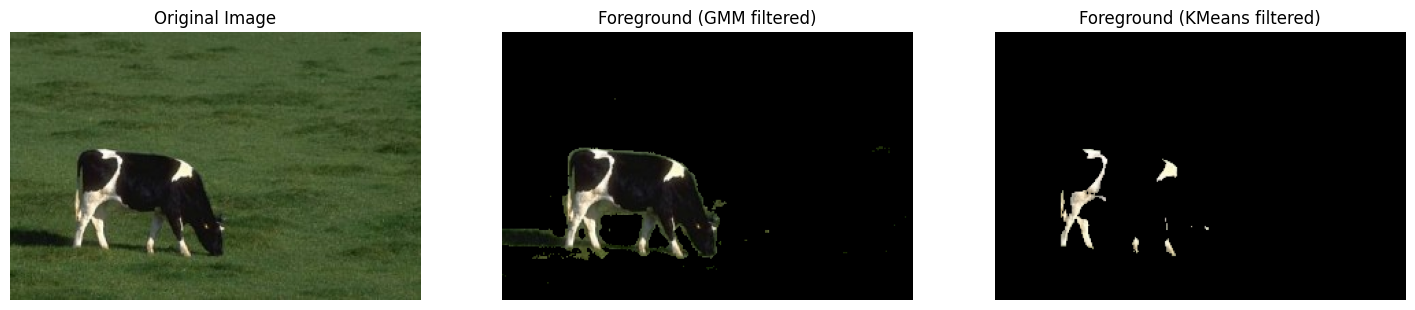

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from collections import Counter

# Bước 1: Đọc ảnh
img = cv2.imread('cow.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB

# Bước 2: Trích xuất đặc trưng từ từng pixel
pixels = img_rgb.reshape(-1, 3)

# --- GMM ---
# Bước 3: Áp dụng Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(pixels)

# Dự đoán mỗi pixel thuộc cụm nào
gmm_labels = gmm.predict(pixels)

# Bước 4: Tạo mask cho foreground GMM
gmm_counts = Counter(gmm_labels)
gmm_fg_label = min(gmm_counts, key=gmm_counts.get)  # cụm nhỏ hơn là foreground
gmm_mask = (gmm_labels == gmm_fg_label).astype(np.uint8).reshape(img.shape[:2])

# Bước 5: Áp dụng mask để lọc nền GMM
gmm_result = img_rgb.copy()
gmm_result[gmm_mask == 0] = [0, 0, 0]  # nền thành đen

# --- KMeans ---
# Bước 3: Áp dụng KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(pixels)

# Bước 4: Tạo mask cho foreground KMeans
kmeans_counts = Counter(kmeans_labels)
kmeans_fg_label = min(kmeans_counts, key=kmeans_counts.get)  # cụm nhỏ hơn là foreground
kmeans_mask = (kmeans_labels == kmeans_fg_label).astype(np.uint8).reshape(img.shape[:2])

# Bước 5: Áp dụng mask để lọc nền KMeans
kmeans_result = img_rgb.copy()
kmeans_result[kmeans_mask == 0] = [0, 0, 0]  # nền thành đen

# Bước 6: Hiển thị kết quả
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gmm_result)
plt.title('Foreground (GMM filtered)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(kmeans_result)
plt.title('Foreground (KMeans filtered)')
plt.axis('off')

plt.show()


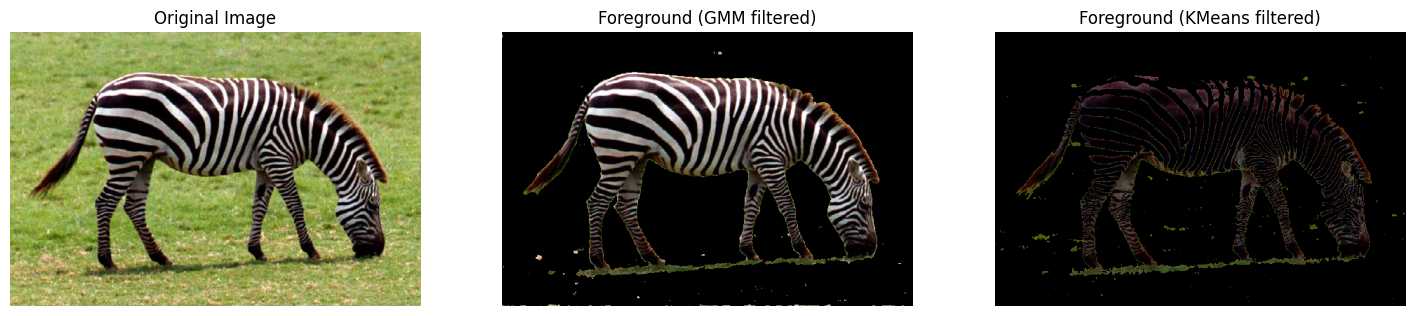

In [25]:
# Bước 1: Đọc ảnh
img = cv2.imread('zebra.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB

# Bước 2: Trích xuất đặc trưng từ từng pixel
pixels = img_rgb.reshape(-1, 3)

# --- GMM ---
# Bước 3: Áp dụng Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(pixels)

# Dự đoán mỗi pixel thuộc cụm nào
gmm_labels = gmm.predict(pixels)

# Bước 4: Tạo mask cho foreground GMM
gmm_counts = Counter(gmm_labels)
gmm_fg_label = min(gmm_counts, key=gmm_counts.get)  # cụm nhỏ hơn là foreground
gmm_mask = (gmm_labels == gmm_fg_label).astype(np.uint8).reshape(img.shape[:2])

# Bước 5: Áp dụng mask để lọc nền GMM
gmm_result = img_rgb.copy()
gmm_result[gmm_mask == 0] = [0, 0, 0]  # nền thành đen

# --- KMeans ---
# Bước 3: Áp dụng KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(pixels)

# Bước 4: Tạo mask cho foreground KMeans
kmeans_counts = Counter(kmeans_labels)
kmeans_fg_label = min(kmeans_counts, key=kmeans_counts.get)  # cụm nhỏ hơn là foreground
kmeans_mask = (kmeans_labels == kmeans_fg_label).astype(np.uint8).reshape(img.shape[:2])

# Bước 5: Áp dụng mask để lọc nền KMeans
kmeans_result = img_rgb.copy()
kmeans_result[kmeans_mask == 0] = [0, 0, 0]  # nền thành đen

# Bước 6: Hiển thị kết quả
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gmm_result)
plt.title('Foreground (GMM filtered)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(kmeans_result)
plt.title('Foreground (KMeans filtered)')
plt.axis('off')

plt.show()


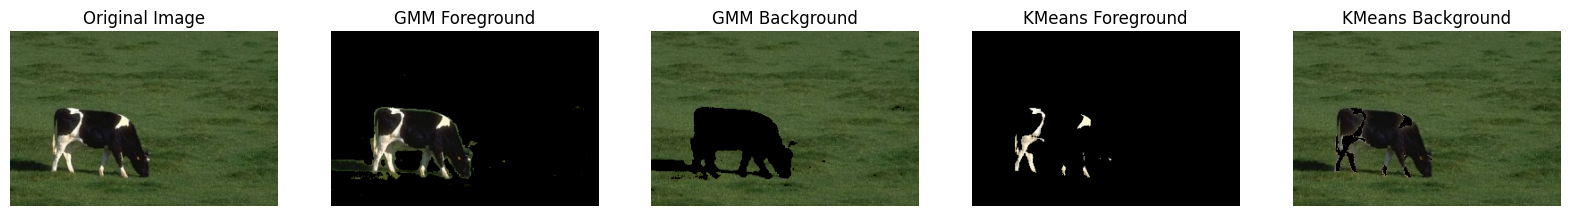

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from collections import Counter

# Bước 1: Đọc ảnh
img = cv2.imread('cow.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB

# Bước 2: Trích xuất đặc trưng từ từng pixel
pixels = img_rgb.reshape(-1, 3)

# --- GMM ---
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(pixels)
gmm_labels = gmm.predict(pixels)
gmm_counts = Counter(gmm_labels)
gmm_fg_label = min(gmm_counts, key=gmm_counts.get)
gmm_mask = (gmm_labels == gmm_fg_label).astype(np.uint8).reshape(img.shape[:2])
gmm_bg_mask = 1 - gmm_mask

gmm_foreground = img_rgb.copy()
gmm_foreground[gmm_mask == 0] = [0, 0, 0]

gmm_background = img_rgb.copy()
gmm_background[gmm_bg_mask == 0] = [0, 0, 0]

# --- KMeans ---
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(pixels)
kmeans_counts = Counter(kmeans_labels)
kmeans_fg_label = min(kmeans_counts, key=kmeans_counts.get)
kmeans_mask = (kmeans_labels == kmeans_fg_label).astype(np.uint8).reshape(img.shape[:2])
kmeans_bg_mask = 1 - kmeans_mask

kmeans_foreground = img_rgb.copy()
kmeans_foreground[kmeans_mask == 0] = [0, 0, 0]

kmeans_background = img_rgb.copy()
kmeans_background[kmeans_bg_mask == 0] = [0, 0, 0]

# Hiển thị kết quả
plt.figure(figsize=(20,8))

plt.subplot(1,5,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(gmm_foreground)
plt.title('GMM Foreground')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(gmm_background)
plt.title('GMM Background')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(kmeans_foreground)
plt.title('KMeans Foreground')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(kmeans_background)
plt.title('KMeans Background')
plt.axis('off')

plt.show()
